# Identitas Developer
> Nama : Muhammad Fadhil Amri <br>
> Email : fadhil.amri131202@gmail.com <br>
> Domisili: Kota Bandung <br>
> Pekerjaan : Mahasiswa Teknik Informatika ITB <br>


# Intro
> Proyek ini adalah proyek Machine Learning dengan task Time Series Forecasting pada harga saham PT Aneka Tambang Tbk. (ANTM) menggunakan data harga <i>Close</i> lima tahun terakhir (Februari 2019 - Februari 2024).<br><br>

# Program

## 1. Import Data
> Sumber Data: https://finance.yahoo.com/quote/ANTM.JK/history?period1=1609459200&period2=1703980800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true


In [1]:
import gdown

URL_DATA = "https://drive.google.com/uc?id=1zpH1bB8PEawHjg89D0oonx8ThMOBymdZ"
gdown.download(URL_DATA)


Downloading...
From: https://drive.google.com/uc?id=1zpH1bB8PEawHjg89D0oonx8ThMOBymdZ
To: /content/ANTM_Price_5Y.csv
100%|██████████| 96.9k/96.9k [00:00<00:00, 2.67MB/s]


'ANTM_Price_5Y.csv'

## 2. Load Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATASET_PATH = "/content/ANTM_Price_5Y.csv"
df = pd.read_csv(DATASET_PATH)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-11,1025.0,1025.0,975.0,980.0,900.947327,222915600.0
1,2019-02-12,980.0,995.0,935.0,960.0,882.560547,182840300.0
2,2019-02-13,975.0,1040.0,950.0,1010.0,928.527405,277124100.0
3,2019-02-14,1020.0,1030.0,985.0,1000.0,919.334045,139034400.0
4,2019-02-15,990.0,995.0,950.0,950.0,873.367310,142476600.0


## 3. Exploratory Data Analysis (EDA)

### Statistika Deskriptif

In [3]:
# Informasi tipe data dari setiap fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1230 non-null   object 
 1   Open       1229 non-null   float64
 2   High       1229 non-null   float64
 3   Low        1229 non-null   float64
 4   Close      1229 non-null   float64
 5   Adj Close  1229 non-null   float64
 6   Volume     1229 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.4+ KB


In [4]:
# Drop column selain Date dan Close karena prediksi hanya menggunakan harga close
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2019-02-11,980.0
1,2019-02-12,960.0
2,2019-02-13,1010.0
3,2019-02-14,1000.0
4,2019-02-15,950.0


In [5]:
# Deskripsi nilai dari fitur Close
df.describe()

,Close
count,1229.000000
mean,1645.986168
std,696.264757
min,348.000000
25%,900.000000
50%,1850.000000
75%,2250.000000
max,3190.000000


### Missing Value

In [6]:
df.isna().sum()

Date     0
Close    1
dtype: int64

> Terdapat missing value pada data

### Time Series Plot

<Figure size 1000x600 with 0 Axes>

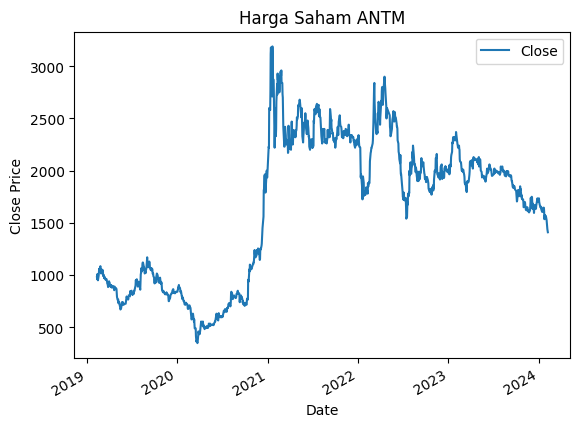

In [7]:
import matplotlib.pyplot as plt

df_temp = df.copy()
df_temp["Date"] = pd.to_datetime(df["Date"])
df_temp = df_temp.set_index("Date")

plt.figure(figsize=(10, 6))
df_temp.plot()
plt.title('Harga Saham ANTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

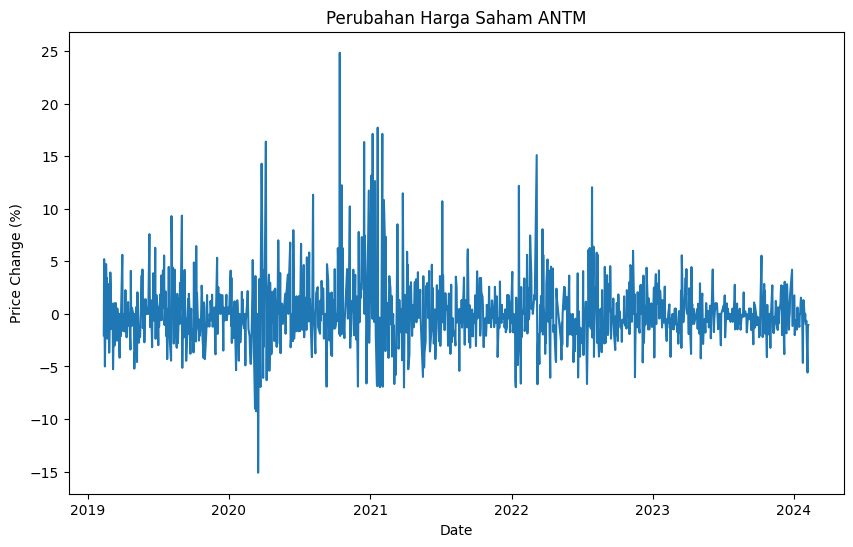

In [8]:
# Hitung perubahan harga saham harian
df_temp['Percentage Change'] = df_temp['Close'].pct_change() * 100

# Plot the perubahan harga saham
plt.figure(figsize=(10, 6))
plt.plot(df_temp.index, df_temp['Percentage Change'], linestyle='-')
plt.title('Perubahan Harga Saham ANTM')
plt.xlabel('Date')
plt.ylabel('Price Change (%)')
plt.show()

### Distribusi Nilai

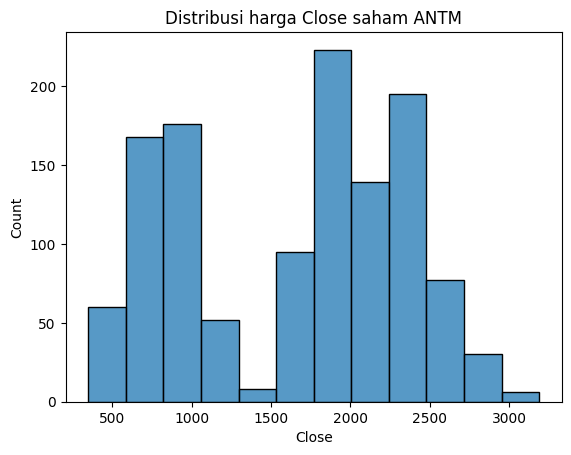

In [9]:
# Plot distribusi nilai pada fitur Close
plt.title("Distribusi harga Close saham ANTM")
sns.histplot(data=df['Close'], label='Close Price', fill=True)
plt.show()

In [10]:
# Tampilkan deskripsi statistik dari persentase perubahan
df_temp.describe()

,Close,Percentage Change
count,1229.000000,1229.000000
mean,1645.986168,0.078880
std,696.264757,3.185655
min,348.000000,-15.102041
25%,900.000000,-1.515152
50%,1850.000000,0.000000
75%,2250.000000,1.290323
max,3190.000000,24.836601


### Outliers

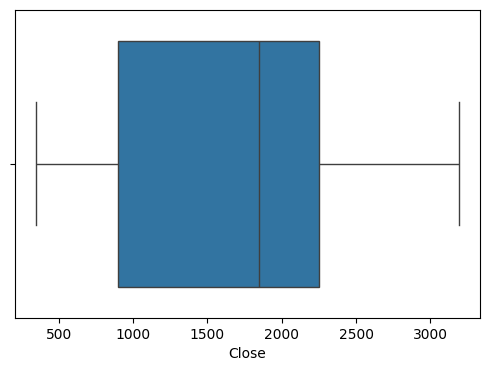

In [11]:
# Identifikasi menggunakan boxplot

for numcol in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[numcol])
    plt.show()
    print()

In [12]:
# Cek Outlier Pada Data

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
outliers=df[((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

outliers

<ipython-input-12-fd1cdcb27fcc>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-12-fd1cdcb27fcc>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-12-fd1cdcb27fcc>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers=df[((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


,Date,Close


> Tidak terdapat outlier pada data

### Seasonal Decomposition

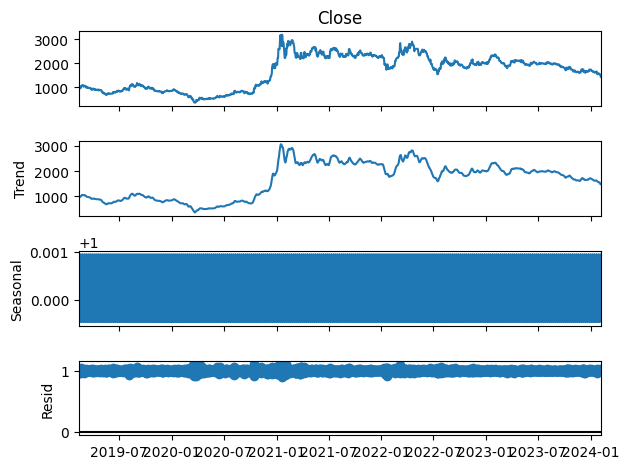

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ubah data agar berada dalam frekuensi harian
df_temp = df_temp.asfreq('D')

# Isi harga saham pada saat pasar tutup dengan harga penutupan hari sebelumnya
df_temp['Close'] = df_temp['Close'].fillna(method='ffill')

# Plot seasonal decomposition
result = seasonal_decompose(df_temp['Close'], model='multiplicative')
result.plot()
plt.show()

> Data secara jangka panjang terdapat tren naik, sedangkan secara jangkap pendek-menengah terdapat tren turun dan terdapat <i>seasonality</i> bersamaan dengan tren tersebut

## 4. Preprocessing

### Format Data

In [14]:
# Ubah data agar berada dalam frekuensi harian
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df = df.asfreq('D')
# df
# Isi harga saham pada saat pasar tutup dengan harga penutupan hari sebelumnya
df['Close'] = df['Close'].fillna(method='bfill')
df=df.reset_index()
df

,Date,Close
0,2019-02-11,980.0
1,2019-02-12,960.0
2,2019-02-13,1010.0
3,2019-02-14,1000.0
4,2019-02-15,950.0
...,...,...
1818,2024-02-03,1440.0
1819,2024-02-04,1440.0
1820,2024-02-05,1440.0
1821,2024-02-06,1425.0


### Split Data

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
# scaler =StandardScaler()
# df['Close'] = scaler.fit_transform(df[['Close']])

X = df['Date']
y = df['Close']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

### Data Scaling

In [16]:
# Fit hanya dilakukan pada data train agar model tidak terpengaruh oleh data validation

y_train_df = y_train.to_frame()
y_train_df["Close"] = scaler.fit_transform(y_train_df[["Close"]])
y_train_norm = y_train_df["Close"]

y_val_df = y_val.to_frame()
y_val_df["Close"] = scaler.transform(y_val_df[["Close"]])
y_val_norm = y_val_df["Close"]

In [17]:
y_train_norm

0       0.222379
1       0.215341
2       0.232935
3       0.229416
4       0.211823
          ...   
1453    0.697396
1454    0.676284
1455    0.676284
1456    0.676284
1457    0.669247
Name: Close, Length: 1458, dtype: float64

### Transforming

In [18]:
# Fungsi untuk menerima sebuah series/atribut yang telah di konversi menjadi tipe numpy, lalu mengembalikan label dan atribut dari dataset dalam bentuk batch
# Agar bisa diterima oleh model
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1) # Menambahkan dimensi dari tensor, -1 berarti pada rank akhir
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [19]:
# Untuk Prophet format dataFrame yang digunakan adalah column ds untuk X dan column y untuk y

df_train = pd.DataFrame({'ds': X_train , 'y': y_train_norm })
df_val = pd.DataFrame({'ds': X_val , 'y': y_val_norm })

## 5. Model Development

In [20]:
# Callback function
import tensorflow as tf
from tensorflow.keras.callbacks import Callback

class ThresholdEarlyStopping(Callback):
    def __init__(self, error_threshold=0.05):
        super(ThresholdEarlyStopping, self).__init__()
        self.error_threshold = error_threshold

    def on_epoch_end(self, epoch, logs=None):
        # Check if both training and validation accuracy meet the threshold
        if logs.get('mse') <= self.error_threshold:
            print(f"\nTraining stopped as mse reached {self.error_threshold}")
            self.model.stop_training = True

In [21]:
threshold_early_stopping = ThresholdEarlyStopping(error_threshold=0.01)

### Prophet

In [22]:
! pip install prophet

In [23]:
from prophet import Prophet

# Interval kepercayaan 95%
model_prophet = Prophet(interval_width=0.95)

In [24]:
model_prophet.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ujjryge/5ypr4wy_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ujjryge/i1tvzzok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53327', 'data', 'file=/tmp/tmp6ujjryge/5ypr4wy_.json', 'init=/tmp/tmp6ujjryge/i1tvzzok.json', 'output', 'file=/tmp/tmp6ujjryge/prophet_modellq185web/prophet_model-20240210141002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
forecast_train = model_prophet.predict(df_train)
forecast_val = model_prophet.predict(df_val)

### LSTM

In [26]:
train_set = windowed_dataset(y_train_norm, window_size=60, batch_size=100, shuffle_buffer=1000)
val_set = windowed_dataset(y_val_norm, window_size=60, batch_size=100, shuffle_buffer=1000)

model_lstm = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True), # Harus diset agar bisa menggunakan dua buah layer LSTM
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [27]:
optimizer = tf.keras.optimizers.SGD(learning_rate=5.0000e-04, momentum=0.9)
model_lstm.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mse"])
history_lstm = model_lstm.fit(train_set, validation_data= val_set, epochs=30, callbacks=[threshold_early_stopping])

Epoch 1/30
14/14 [==============================] - 13s 398ms/step - loss: 0.1245 - mse: 0.2489 - val_loss: 0.1272 - val_mse: 0.2543
Epoch 2/30
14/14 [==============================] - 4s 272ms/step - loss: 0.1039 - mse: 0.2079 - val_loss: 0.0949 - val_mse: 0.1897
Epoch 3/30
14/14 [==============================] - 4s 245ms/step - loss: 0.0804 - mse: 0.1608 - val_loss: 0.0662 - val_mse: 0.1323
Epoch 4/30
14/14 [==============================] - 4s 245ms/step - loss: 0.0601 - mse: 0.1202 - val_loss: 0.0454 - val_mse: 0.0908
Epoch 5/30
14/14 [==============================] - 4s 281ms/step - loss: 0.0484 - mse: 0.0967 - val_loss: 0.0306 - val_mse: 0.0612
Epoch 6/30
14/14 [==============================] - 4s 248ms/step - loss: 0.0385 - mse: 0.0771 - val_loss: 0.0215 - val_mse: 0.0430
Epoch 7/30
14/14 [==============================] - 2s 126ms/step - loss: 0.0336 - mse: 0.0671 - val_loss: 0.0164 - val_mse: 0.0328
Epoch 8/30
14/14 [==============================] - 2s 124ms/step - loss: 0

## 6. Evaluasi

In [28]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing
import math
from sklearn.metrics import mean_squared_error
mse = pd.DataFrame(columns=['train', 'val'], index=['Prophet','LSTM'])

# Buat dictionary untuk setiap algoritma yang digunakan

mse.loc['Prophet', 'train'] = mean_squared_error(y_true=df_train['y'], y_pred=forecast_train['yhat'])
mse.loc['Prophet', 'val'] = mean_squared_error(y_true=df_val['y'], y_pred=forecast_val['yhat'])
mse.loc['LSTM', 'train'] = history_lstm.history['mse'][-1]
mse.loc['LSTM', 'val'] = history_lstm.history['val_mse'][-1]

# Panggil mse
mse

,train,val
Prophet,0.004548,0.002859
LSTM,0.037158,0.006557


> Dapat dilihat bahwa model Prophet memiliki MSE yang lebih kecil daripada model LSTM sehingga model yang akan dipilih untuk melakukan <i> forecasting </i> adalah model Prophet

## 7. Forecasting

> Melakukan Prediksi untuk setahun ke depan (2024)

In [29]:
df = df.rename(columns={'Date':'ds', 'Close':'y'})
df.head()

,ds,y
0,2019-02-11,980.0
1,2019-02-12,960.0
2,2019-02-13,1010.0
3,2019-02-14,1000.0
4,2019-02-15,950.0


In [30]:
model_final = Prophet(interval_width=0.95)
model_final.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ujjryge/q9mhm3aj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ujjryge/_2p3kofm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88691', 'data', 'file=/tmp/tmp6ujjryge/q9mhm3aj.json', 'init=/tmp/tmp6ujjryge/_2p3kofm.json', 'output', 'file=/tmp/tmp6ujjryge/prophet_model2432ykfr/prophet_model-20240210141140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [31]:
future_dates = model_final.make_future_dataframe(periods=365, freq='D')
forecast = model_final.predict(future_dates)

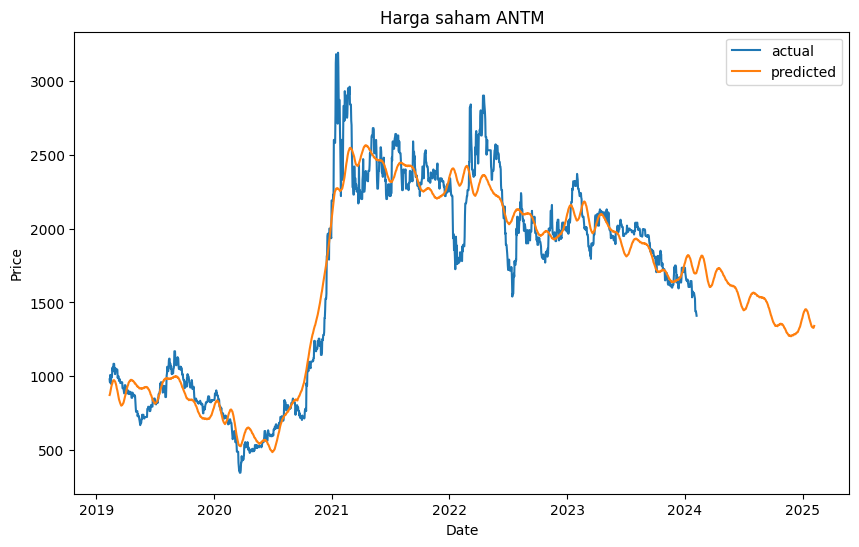

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df['ds']), df['y'], linestyle='-', label='actual')
plt.plot(pd.to_datetime(forecast['ds']), forecast['yhat'], linestyle='-', label='predicted')
plt.legend()
plt.title("Harga saham ANTM")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [33]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2019-02-11,873.854840
1,2019-02-12,880.459301
2,2019-02-13,893.166658
3,2019-02-14,907.103471
4,2019-02-15,916.452985
...,...,...
2183,2025-02-02,1329.806694
2184,2025-02-03,1330.408348
2185,2025-02-04,1328.480223
2186,2025-02-05,1333.690300


> Berdasarkan grafik prediksi harga saham ANTM selama satu tahun, dapat diperkirakan bahwa waktu yang terbaik untuk membeli saham ANTM pada saat harga berada pada kisaran 1.350 - 1.400 dan menjualnya untuk <i> take profit </i> terdekat pada level 1.700